# Анализ продаж для планирования рекламной кампании консольных игр на 2017 г.
# Введение

Данная исследовательская работа направлена на изучение данных об играх на существующих игровых консолях. Для грамотного планирования рекламной кампании необходимо изучить самые популярные платформы, игры и их жанры, спрогнозировать потенциально прибыльные платформы и составить портрет потребителя в трех выбранных регионах. 

**Основные задачи проекта**:
- Изучение рынка консолей, выбор наиболее популярных моделей. 
- Изучение рынка продаж игр, выбор наиболее популярных игр и жанров. 
- Составить портрет пользователя трех наиболее интересующих регионов (NA, EU, JP)

**План работ:**

- Выгрузка и подготовка данных.
- Анализ платформ с максимальными продажами.
- Выбор актуального периода для анализа данных.
- Выбор потенциально прибыльных платформ в соответствии с выбранным актуальным периодом. 
- Анализ глобальных продаж игр по платформам.
- Изучение влияния отзывов критиков и игроков на продажи игр.
- Изучение игр в разрезе популярных и непопулярных жанров. 
- Анализ и составление портрета пользователя из разных регионов (NA, EU, JP).
- Проверка гипотез. 

# 1. Открытие датафрейма

Импортируем необходимые библиотеки и изучим датафрейм: <a id='info1'></a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
#data = pd.read_csv(r'C:\Users\Seal\PycharmProjects\games.csv')
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В исследуемом датафрейме - 11 колонок, предлагаю сделать следующие шаги в процессе предобработки данных: 
- Перевести названия столбцов в нижний регистр.
- Изучить столбцы на предметр пропусков и неверных данных.
- Заполнить пропуски там, где это необходимо. 
- Изменить тип столбца **Year_of_Release** с типа `float64` на целочисленный `int64`
- Изучить, почему тип данных столбца **User_Score** - `object`, а не `float64`

# 2. Предобработка данных
## 2.1. Замена названий столбцов
Как видно, первые буквы названия столбцов написаны в верхнем регистре, заменим это при помощи генератора списков и функции приведения к нижнему регистру `.lower()`.

In [2]:
data.columns = [x.lower() for x in data.columns]

In [3]:
data.columns #преобразование удалось- названия колонок теперь в нижнем регистре

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## 2.2. Преобразование данных в столбцах
Посмотрим на столбцы, при необходимости- преобразуем типы и заполним пропуски. 

In [4]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Столбец `name`
Если посмотрим на [информацию](#info1) о датафрейме, то увидим, что в этом столбце присутствуют пропуски. 
По запросу видно, что таких строк всего 2. Предлагаю их удалить как нерелевантные, т.к.строк всего 2 и в них указаны игры 1993 года (слишком старые) - удаление таких строк не окажет влияние на исследование.

In [5]:
data.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
data = data.query('not(name != name)')

### Столбцы `platform`, `genre`, `na_sales`, `eu_sales`, `jp_sales`, `other_sales`
Если опять же взглянем на [информацию](#info1) о датафрейме, то увидим, что в этих столбцах нет пропусков, данные отображаются в корректных типах. Проверим текстовые столбцы `platform` и `genre` при помощи метода `unique()` на неявные дубликаты и убедимся, что они отсутствуют. Оставим столбцы без изменений.

In [7]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

### 2.2.1. Столбец `year_of_release`
Видим, что в данном столбце есть пропуски, проверим, сколько их. 
Т.к. количество пропусков не превышает 2% от общего количества, а дата выпуска игры- основа нашего исследования, удалим эти данные и преобразуем столбец в тип `datetime`, а затем возьмем из формата даты- год производства.

In [9]:
len(data.query('year_of_release != year_of_release'))

269

In [10]:
data = data.query('not(year_of_release != year_of_release)')
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y')
data['year_of_release'] = pd.DatetimeIndex(data['year_of_release']).year

In [11]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### 2.2.2. Столбец `user_score`
Посмотрим, почему этот столбец имеет тип `object`, а не `float64` - выгрузим уникальные значения по колонке при помощи `value_counts()`. Видно, что кое-где пропуски заполнены не NaN, a 'tbd' - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Заменим 'tbd' на NaN при помощи логической индексации, а затем преобразуем при помощи функции `to_numeric()` численные значения в тип `float64`:

In [13]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
9.6       2
0.9       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [15]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'ignore')

In [16]:
data.query('user_score == "tbd"') #значение 'tbd' отсутствует

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### 2.2.3. Пропуски в столбцах `critic_score`, `user_score`, `rating`
[Видно](#info1) ,что в данных столбцах пропущено примерно 40-50% значений. 

Для столбцов с количественными данными `critic_score` и `user_score` - это очень много и добиться верного заполнения пропусков - невозможно. Есть вариант для столбцов `critic_score`, `user_score` сделать группировку по дате, платформе и жанру и заполнить пропуски средними значениями оценок, но я не считаю это правильным - оценка является субьективным понятием и не зависит от других оценок игр с подобными параметрами.  Поэтому столбцы `critic_score` и `user_score` оставим без изменения. 

А вот в столбце `rating` - категориальные переменные, изучим их и попробуем заполнить пробелы. 

Приступим к заполнению пропусков рейтинга. Если загрузить уникальные значения в этом столбце, что увидим, что некоторые рейтинги имеют малое количество значений. Соединим их с другими, более массовыми категориями рейтинга: 
- **EC** (от 3 лет) и **К-А** (от 6 лет) - перенесем в категорию **Е** (игры для всех)
- **RP** (ожидает рейтинг) и **АО** (игры от 18 лет) - перенесем в категорию **M** (игры для взрослых, старше 17 лет). 

In [17]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [18]:
data.loc[data['rating'] == 'EC', 'rating'] = 'E'
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data.loc[data['rating'] == 'RP', 'rating'] = 'M'
data.loc[data['rating'] == 'AO', 'rating'] = 'M'

In [19]:
data['rating'].value_counts() #уменьшили количество категорий, но пропуски сохраняются

E       3932
T       2905
M       1538
E10+    1393
Name: rating, dtype: int64

Напишем функцию, где присвоим каждой из категории рейтинга численное значение, затем заполним пропуски медианным значением по жанру игры и затем вернем строковые значения рейтинга. 

In [20]:
def rating_score(rating): #функция для присвоения рейтингу численных значений
    if rating == 'E':
        return 1
    if rating == 'E10+':
        return 2
    if rating == 'T':
        return 3
    if rating == 'M':
        return 4

In [21]:
data['rating_score'] = data['rating'].apply(rating_score)
data['rating_score'].value_counts()

1.0    3932
3.0    2905
4.0    1538
2.0    1393
Name: rating_score, dtype: int64

In [22]:
data['rating_score'] = data.groupby(['genre'])['rating_score'].apply(lambda x: x.fillna(x.median())) #заполним пропуски
data['rating_score'].value_counts()

1.0    6837
3.0    5523
2.0    2246
4.0    1838
Name: rating_score, dtype: int64

In [23]:
def rating_new(rating):  #функция для возврата строковых значений рейтинга
    if rating == 1:
        return 'E'
    if rating == 2:
        return 'E10+'
    if rating == 3:
        return 'T'
    if rating == 4:
        return 'M'

In [24]:
data['rating'] = data['rating_score'].apply(rating_new)
data.drop(columns = 'rating_score', axis = 1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,T
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E10+
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E


In [25]:
data['rating'].value_counts()

E       6837
T       5523
E10+    2246
M       1838
Name: rating, dtype: int64

## 2.3 Подсчет общего количества продаж
Создадим столбец **total_sales**, где подсчитаем суммарные продажи игр. 

In [26]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_score,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,1.0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,3.0,31.38


Проверим датафрейм на наличие дубликатов и посмотрим инфо по датафрейму после преобразований:

In [27]:
print(data.duplicated().sum())

0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  rating_score     16444 non-null  float64
 12  total_sales      16444 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


Как видно, все необходимые преобразования произведены, можно приступать непосредственно к исследованию. 

# 3. Исследовательский анализ данных
## 3.1. Выпуск игр по годам
Исследуем, сколько игр выпускалось по годам - построим график на основе данных сводной таблицы.
Видно, что до 1990 г. релизы игр были единичными, после 1994 года наблюдается умеренный рост количества выпущенных игр. После 2001 года рост усиливается и достигает своего пика в 2008-2009 годах, а затем идет на спад. С 2012 г. наблюдается резкий спад количества выпускаемых игр, и в периоде с 2012 включительно по 2016 год - количество выпущенных игр практически неизменно. 

Считаю, что для дальнейшего исследования необходимо использовать период за последние 5 лет (т.е. 2012-2016 гг. включительно):
- данные по количеству выпущенных игр с 2007 по 2011 г. - ощутимо больше периода 2012-2016 гг. 
- компьютерные игры быстро устаревают и игры, выпущенные более 5 лет назад уже не продаются массово и интересны только ограниченному кругу потребителей.

<AxesSubplot:xlabel='Годы выпуска игр', ylabel='Количество выпущенных игр'>

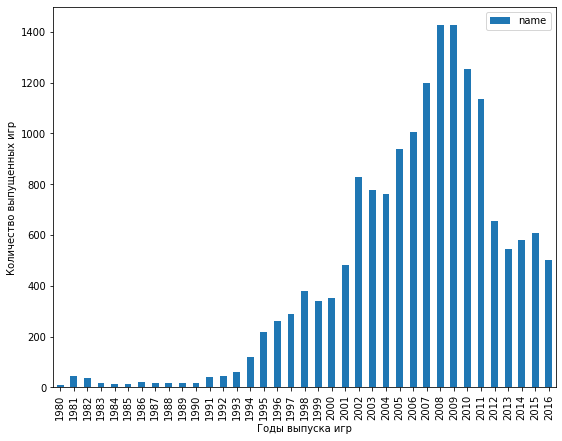

In [29]:
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot(kind = 'bar', 
                                    figsize = (9, 7), xlabel = 'Годы выпуска игр', ylabel = 'Количество выпущенных игр')

## 3.2. Продажи по платформам.
При помощи агрегирования в сводную таблицу, найдем платформы с самыми большими продажами. Видно, что самые крупные продажи наблюдаются по платформам из списка ниже (всего 6 платформ). 

<AxesSubplot:xlabel='Платформа', ylabel='Сумма продаж'>

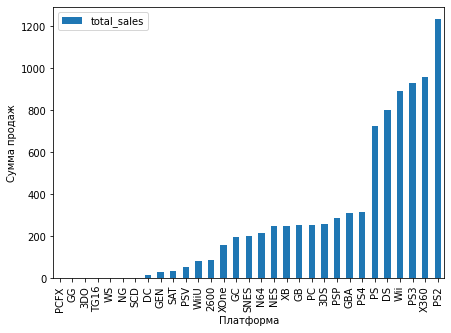

In [30]:
data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales').plot(
    kind = 'bar', figsize = (7, 5), xlabel = 'Платформа', ylabel = "Сумма продаж")

In [31]:
data_top_sales = data.pivot_table(index = 'platform', values = 'total_sales',
                            aggfunc = 'sum').query('total_sales > 700').sort_values(by = 'total_sales', ascending = False)
data_top_sales
#ТОП продаж за весь период

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


Для визуализации времени жизни каждой из платформ нарисуем столбчатую диаграмму, которая покажет года жизни и продажи по каждой из платформ. 

<AxesSubplot:xlabel='Год продажи консоли', ylabel='Сумма продаж'>

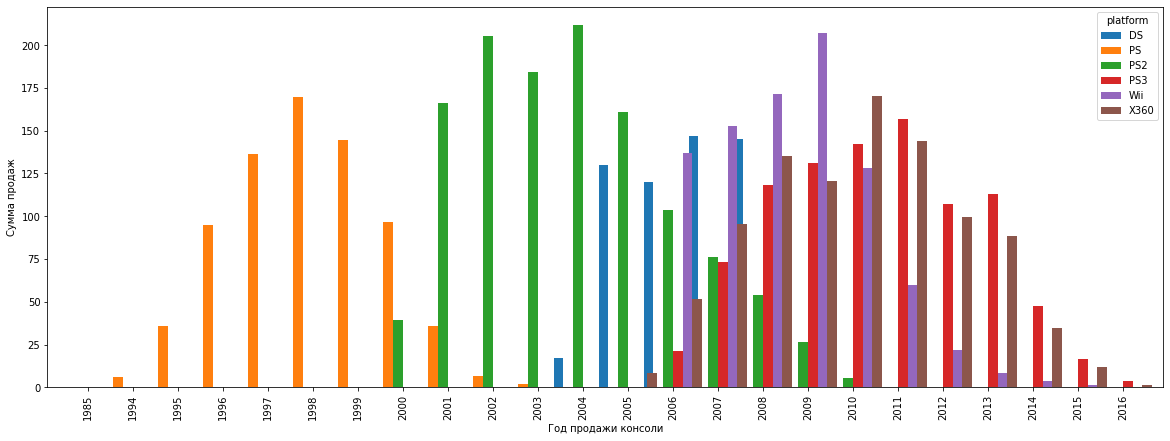

In [32]:
data.query('platform in @data_top_sales.index').pivot_table(
    columns = 'platform', index = 'year_of_release', values = 'total_sales', 
    aggfunc = 'sum', fill_value=0).plot(kind = 'bar', width = 1.3, linewidth = 100, 
    figsize = (20, 7), xlabel =  "Год продажи консоли", ylabel = "Сумма продаж")

Если проанализировать полученные графики, то можно заметить, что платформы PS заменяют друг друга с периодичностью 7-9 лет (PS-PS2-PS3). Такая же продолжитьтельность жизнедеятельности, в среднем, и у других платформ.
Максимальные продажи в год зафиксированы у платформ PS2 (2002 и 2004 г.) и Wii (2009 г.)

Исходя из графика, считаю, что в среднем платформы сменяют друг друга каждые 7-8 лет. Проверим среднюю "продолжительность жизни" каждой из платформ рассчетным методом. Видно, что, как и предполагалось, **средний срок жизни платформы- 7,7 лет**.

In [33]:
data_platform_life = data[['platform', 'year_of_release']]
data_platform_life = data_platform_life.drop_duplicates()
data_platform_life = data_platform_life.groupby('platform')['year_of_release'].count()
round(data_platform_life.mean(), 1)

7.7

## 3.3. Анализ актуальных данных

Однако возможно, что в топ продаж попали старые платформы, которые сейчас не актуальны. Сделаем запрос на основании вывода из прошлого пункта и рассмотрим игры, выпущенные позже 2014 г. (т.е за последние 3 года).
Видно, что лидеры продаж полностью изменились - лидируют приставки PS4 и XOne, далее идут 3DS, WiiU, PS3 (предок PS4) и PC (игры на компьютере)
Т.к. компьютерные игры быстро становятся неактуальными, будем исследовать платформы, которые лидируют уже после 2014 г. 

In [34]:
data_actual = data.query('year_of_release > 2014')

<AxesSubplot:xlabel='Консоль', ylabel='Сумма продаж'>

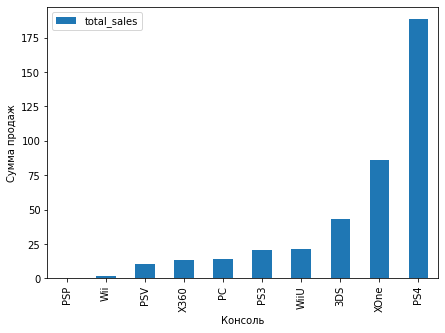

In [35]:
data_actual.pivot_table(
    index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales').plot(
    kind = 'bar', figsize = (7, 5), xlabel =  "Консоль", ylabel = "Сумма продаж")

Тот же список мы получим, если выгрузим ТОП продаж с 2014 г.Видно, что лидером продаж является платформа PS4, на втором месте - XOne , третье место заняла платформа 3DS. Построим распределение продаж по годам и посмотрим, какими были продажи в разные годы для выбранных платформ. 

In [36]:
data_actual.pivot_table(index = 'platform', values = 'total_sales', 
                                                 aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(6)
#ТОП продаж с 2014 г.

,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77


Если изучить графики распределения продаж, то можно отметить:
- Платформы `X360`, `PS3` и `3DS` - очевидно, выходят из обращения, т.к. на графиках мы видим спад продаж практически до нуля. 
- Платформы `XOne` и `PS4`, наоборот- до 2015 г. наблюдался рост продаж (пик- в 2015 г.), в 2016 г. продажи просели, но это может быть обусловлено неполными данными за 2016 г.
- На платформе `WiiU` пик продаж наблюдался в 2014 г., далее идет значительное падение к 2016 г. при неплохих продажах в 2015 г. Опять же, предполагаю, что серьезное падение в 2016 г. связано с недостатком данных. 

<AxesSubplot:xlabel='Год выпуска', ylabel='Объем продаж'>

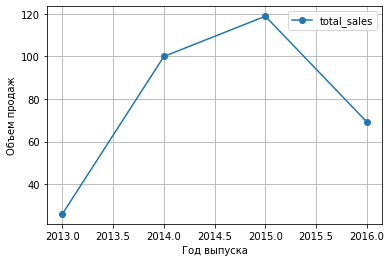

In [37]:
data.query('platform == "PS4" and year_of_release > 2011').pivot_table(index = 'year_of_release', values = 'total_sales',    
                                            aggfunc = 'sum').plot(style = 'o-', grid = True, 
                                                                 xlabel = "Год выпуска", ylabel = "Объем продаж")

<AxesSubplot:xlabel='Год выпуска', ylabel='Объем продаж'>

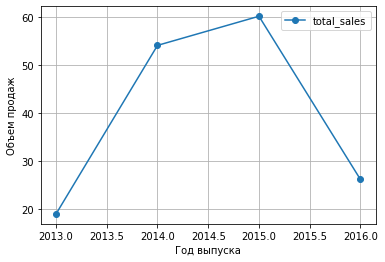

In [38]:
data.query('platform == "XOne" and year_of_release > 2011').pivot_table(index = 'year_of_release', values = 'total_sales',    
                                            aggfunc = 'sum').plot(style = 'o-', grid = True,
                                                                 xlabel = "Год выпуска", ylabel = "Объем продаж")

<AxesSubplot:xlabel='Год выпуска', ylabel='Объем продаж'>

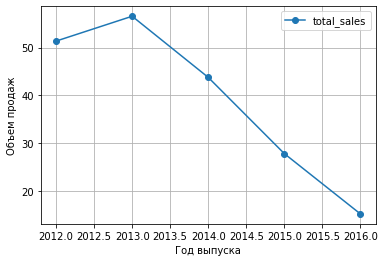

In [39]:
data.query('platform == "3DS" and year_of_release > 2011').pivot_table(index = 'year_of_release', values = 'total_sales',    
                                            aggfunc = 'sum').plot(style = 'o-', grid = True,
                                                                 xlabel = "Год выпуска", ylabel = "Объем продаж")

<AxesSubplot:xlabel='Год выпуска', ylabel='Объем продаж'>

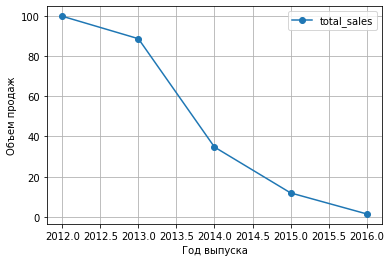

In [40]:
data.query('platform == "X360" and year_of_release > 2011').pivot_table(index = 'year_of_release', values = 'total_sales',    
                                            aggfunc = 'sum').plot(style = 'o-', grid = True,
                                                                 xlabel = "Год выпуска", ylabel = "Объем продаж")

<AxesSubplot:xlabel='Год выпуска', ylabel='Объем продаж'>

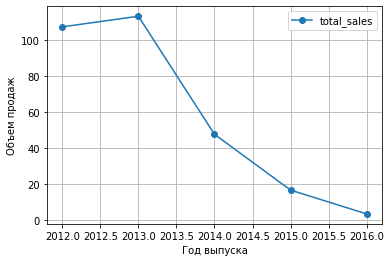

In [41]:
data.query('platform == "PS3" and year_of_release > 2011').pivot_table(index = 'year_of_release', values = 'total_sales',    
                                            aggfunc = 'sum').plot(style = 'o-', grid = True,
                                                                 xlabel = "Год выпуска", ylabel = "Объем продаж")

<AxesSubplot:xlabel='Год выпуска', ylabel='Объем продаж'>

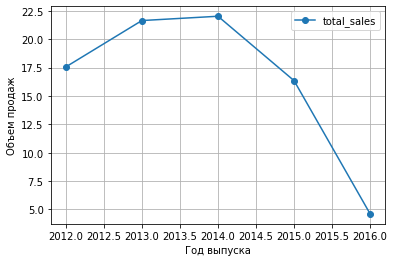

In [42]:
data.query('platform == "WiiU" and year_of_release > 2011').pivot_table(index = 'year_of_release', values = 'total_sales',    
                                            aggfunc = 'sum').plot(style = 'o-', grid = True,
                                                                 xlabel = "Год выпуска", ylabel = "Объем продаж")

Таким образом, я предполагаю, что в потенциально прибыльные платформы мы точно можем отнести `XOne` и `PS4`. Посмотрим сумму продаж за последние 2 года и выберем еще пару популярных платформ. 
Видим, что в ТОП-5 продаж все еще попадают `3DS` и `PS3`, а также попала еще одна платформа- `WiiU`. Заменим платформу `PS3` как устаревающую на игры для `PC`- они находятся на 6 месте, но все-таки популярность подобных игр не угасает. 

In [43]:
data_actual_top = data_actual.query('year_of_release > 2014').pivot_table(index = 'platform', values = 'total_sales', 
                                    aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(6)
data_actual_top = data_actual_top.query('platform != "PS3"')
data_actual_top

,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PC,13.77


Платформа Х360 не была мною выбрана, т.к. я считаю ее в срезе данного исследования устаревающей, и, несмотря на историю ее больших продаж, платформа будет заменяться на последователь XOne. Также, насколько я знаю, на платформу Х360 нет каких-то эксклюзивных игр, которые не выпускаются на иных популярных консолях, таких как PS3/PS4. 

Платформы PS4, XOne я выбираю как массовые и кассовые, WiiU, 3DS и PC - как менее кассовые, но тем не менее, привлекательные для нишевого потребителя. 

### 3.3.1. Анализ глобальных продаж игр на приоритетных платформах. 
При помощи графика `boxplot` проанализируем глобальные продажи на выбранных приоритетных платформах. 

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

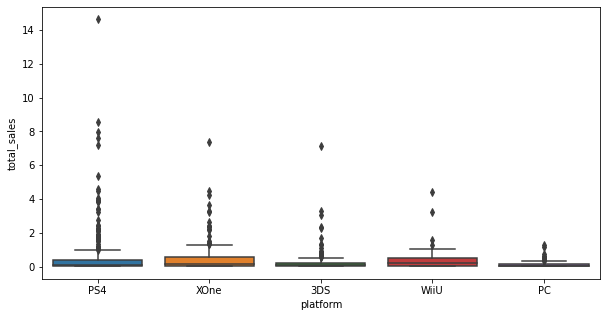

In [44]:
plt.figure(figsize=[10,5])
sns.boxplot(data = data_actual.query('platform in @data_actual_top.index'), x = 'platform', y = 'total_sales')

Если посмотреть на график "ящик с усами" для выбранных платформ, то видим, что верхние значения межквартильного размаха для всех исследуемых платформ не превышают значения 2. Каждая из платформ дает "выбросы" выше максимального значения межквартильного размаха. Эти "выбросы"- это наиболее кассовые игры по каждой из платформ, которые не вписываются в общую картину. Как видно, лидером здесь является платформа `PS4`: макисмальный выброс находится в районе 14 и это самая кассовая игра из всех на исследуемых платформах. Далее идут платформы `XOne` и `3DS` - максимально кассовые игры на этих платформах достигают значения 8. И замыкают топ платформы `WiiU` и `РС` с максимальными "выбросами" в районе 6 и 2 соответственно. 

Замечу, что на данном графике самые кассовые игры помечаются как выбросы, т.к. они не входят в межквартильный размах (т.е Q3+1,5IQR) и выбиваются из общей статистической картины. 

Ограничим ось Y значением 2, тем самым увеличив масштабирование, и рассмотрим платформы отдельно. 

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

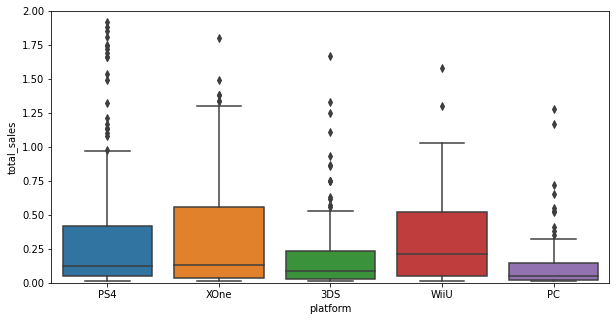

In [45]:
plt.figure(figsize=[10,5])
plt.ylim([0, 2])
sns.boxplot(data = data_actual.query('platform in @data_actual_top.index'), x = 'platform', y = 'total_sales')

Если проанализировать график, можно сделать следующие выводы:
- Нижняя граница межквартильного размаха одинакова для всех платформ и находится в районе 0.01-0.05.
- Медианное значение продаж игр сдвинуто к нижней границе Q1 (первый квартиль) и опять же, очень близко для всех платформ и находится на уровне 0,15 - 0,2, за исключением платформ `WiiU` (медиана в районе 0,25) и `PC`(медиана на уровне 0,05) - т.е. 50% игр зарабатывают менее этого значения.
- Уровень третьего квартиля Q3 выше всего у платформ `XOne` и `WiiU` -  находится на уровне 0,55. Далее идет платформа `PS4` - ок. 0,4; `3DS` - ок. 0,25 и меньше всех эта граница у платформы `PC` - на уровне 0,2. Граница Q3 показывает нам, что 75% игр платформы зарабатывают меньше этого уровня. 
- Максимумы статистически значимой выборки (верхний межквартильный размах) также разнятся в зависимости от платформы: выше всех у `XOne` - 1,35, далее идет `WiiU` - 1,05, `PS4` - 1,00, `3DS` - 0.50 и завершает пятерку `PC` - 0,4. 


**Самые кассовые игры по платформам**

По диаграмме boxplot() видно, что некоторые игры не списываются в статистическую выборку и идут на диаграмме как "выбросы". Сделаем выгрузку самых кассовых игр по выбранным платформам, основываясь на уровне "выбросов" из диаграммы "ящик с усами".

**1. Платформа `PS4`**

In [46]:
data_actual.query('platform == "PS4" and total_sales > 5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_score,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,4.0,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,1.0,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,4.0,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,1.0,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,4.0,7.17
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,3.0,5.39


**2. Платформа `XOne`**

In [47]:
data_actual.query('platform == "XOne" and total_sales > 3')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_score,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,M,4.0,7.39
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,3.0,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.0,4.22
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,M,4.0,3.66
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,4.0,3.28
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,1.0,3.25


**3. Платформа `3DS`**

In [48]:
data_actual.query('platform == "3DS" and total_sales > 2')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_score,total_sales
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,T,3.0,7.14
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,T,3.0,3.32
457,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,0.51,1.02,1.40,0.12,66.0,6.9,E,1.0,3.05
677,The Legend of Zelda: Majora's Mask 3D,3DS,2015,Action,1.15,0.55,0.47,0.17,89.0,9.0,E10+,2.0,2.34
694,Yokai Watch Busters,3DS,2015,Action,0.00,0.00,2.29,0.00,NaN,NaN,T,3.0,2.29


**4. Платформа `WiiU`**

In [49]:
data_actual.query('platform == "WiiU" and total_sales > 2')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_score,total_sales
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,2.0,4.44
424,Super Mario Maker,WiiU,2015,Platform,1.18,0.89,0.94,0.20,88.0,8.7,E,1.0,3.21


**5. Платформа `PС`**

In [50]:
data_actual.query('platform == "PC" and total_sales > 1')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_score,total_sales
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,4.0,1.28
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,4.0,1.17


### 3.3.2. Влияние отзывов на продажи
Рассмотрим влияние отзывов критиков и пользователей на продажи. 
Для этого возьмем самую кассовую из выбранных платформ - `PS4` и посмотрим корреляцию между продажами и отзывами.

**1. Платформа PS4**

Рассмотрим корреляцию между отзывами критиков и продажами. Как видно по коэффициенту корреляции, эти величины хоть и связаны, но слабо, что подтверждает диаграмма рассеяния - здесь видно, что игры с большой кассовостью продаж сконцентрированы в зоне более высоких отзывов критиков, однако- высокий отзыв критиков не гарантирует кассовую игру. Видно, что многие игры и с высокими отзывами критиков (более 80), все равно находятся в околонулевой зоне продаж. 

In [51]:
data_actual.query('platform == "PS4"')['total_sales'].corr(data_actual.query('platform == "PS4"')['critic_score'])

0.3928485555130601

<AxesSubplot:title={'center':'Зависимость продаж игр от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

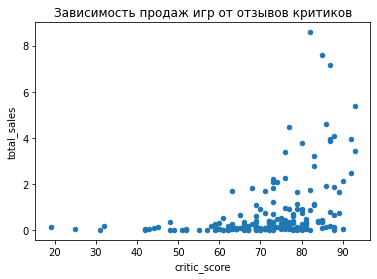

In [52]:
data_actual.query('platform == "PS4"').plot(x = 'critic_score', y = 'total_sales', 
                                            kind = 'scatter', title = ('Зависимость продаж игр от отзывов критиков'))

Если же посмотрим корреляцию между отзывами пользователей и общими продажами игры, то здесь видно, что никакой взаимосвязи между величинами нет. Видно, что кассовыми становятся игры с любыми отзывами пользователей - от 3 и до 9, то же самое можно сказать и в обратную сторону- немалая часть игр с высоким рейтингом игроков не становится кассовой. 
Таким образом, связи между отзывами пользователей и продажами- нет. 

In [53]:
data_actual.query('platform == "PS4"')['total_sales'].corr(data_actual.query('platform == "PS4"')['user_score'])

-0.05973845712638215

<AxesSubplot:title={'center':'Зависимость продаж игр от отзывов пользователей'}, xlabel='user_score', ylabel='total_sales'>

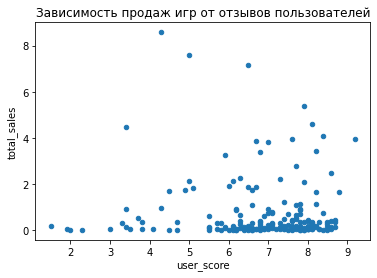

In [54]:
data_actual.query('platform == "PS4"').plot(x = 'user_score', y = 'total_sales', 
                                            kind = 'scatter', title = ('Зависимость продаж игр от отзывов пользователей'))

Посмотрим то же самое и для других выбранных платформ: 

**2. Платформа `XOne`**

Здесь коэффициенты корреляции и графики практически совпадают со значениями предыдущей платформы `PS4`- все продаваемые игры на данной платформе имели хорошие отзывы критиков, но эта зависимость нелинейная- не все игры с хорошими отзывами становятся продаваемыми хитами. 

Между отзывами пользователей и продажами связи нет- как видно на графике, есть как кассовые игры с оценкой пользователей 3, так и игры с низкими продажами, но высоко оцененные игроками. 

In [55]:
data_actual.query('platform == "XOne"')['total_sales'].corr(data_actual.query('platform == "XOne"')['critic_score'])

0.430888745821368

<AxesSubplot:title={'center':'Зависимость продаж игр от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

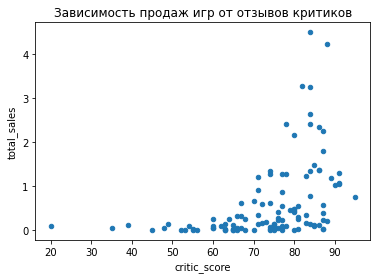

In [56]:
data_actual.query('platform == "XOne"').plot(x = 'critic_score', y = 'total_sales', 
                                            kind = 'scatter', title = ('Зависимость продаж игр от отзывов критиков'))

In [57]:
data_actual.query('platform == "XOne"')['total_sales'].corr(data_actual.query('platform == "XOne"')['user_score'])

-0.04146733387366271

<AxesSubplot:title={'center':'Зависимость продаж игр от отзывов пользователей'}, xlabel='user_score', ylabel='total_sales'>

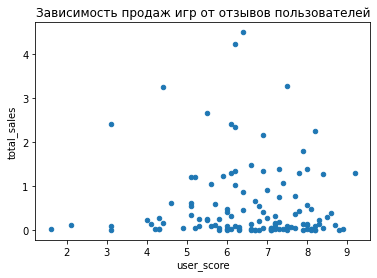

In [58]:
data_actual.query('platform == "XOne"').plot(x = 'user_score', y = 'total_sales', 
                                            kind = 'scatter', title = ('Зависимость продаж игр от отзывов пользователей'))

**3. Платформа `3DS`**

Здесь, в целом, сохраняется тенденция предыдущих платформ, но есть одно но- коэффициент зависимости между отзывами критиков и продажами ниже, чем в предыдущих вариантах, однако коэффициент зависимости между отзывами пользователей и продажами- растет, между этими величинами наблюдается слабая зависимость. 

In [59]:
data_actual.query('platform == "3DS"')['total_sales'].corr(data_actual.query('platform == "3DS"')['critic_score'])

0.17757455046092874

<AxesSubplot:title={'center':'Зависимость продаж игр от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

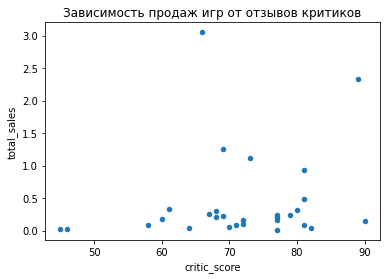

In [60]:
data_actual.query('platform == "3DS"').plot(x = 'critic_score', y = 'total_sales', 
                                            kind = 'scatter', title = ('Зависимость продаж игр от отзывов критиков'))

In [61]:
data_actual.query('platform == "3DS"')['total_sales'].corr(data_actual.query('platform == "3DS"')['user_score'])

0.19879627008102985

<AxesSubplot:title={'center':'Зависимость продаж игр от отзывов пользователей'}, xlabel='user_score', ylabel='total_sales'>

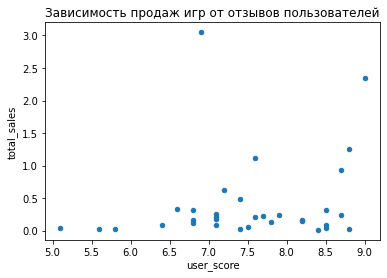

In [62]:
data_actual.query('platform == "3DS"').plot(x = 'user_score', y = 'total_sales', 
                                            kind = 'scatter', title = ('Зависимость продаж игр от отзывов пользователей'))

**4. Платформа `WiiU`**

На этой платформе наблюдается примерно равная слабая связь как между отзывами критиков и продажей, так и между отзывами пользователей и продажей. Можно сказать, что именно на этой платформе пользователи больше всего ориентируются на отзывы при выборе игры. 

In [63]:
data_actual.query('platform == "WiiU"')['total_sales'].corr(data_actual.query('platform == "WiiU"')['critic_score'])

0.31704571176962204

<AxesSubplot:title={'center':'Зависимость продаж игр от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

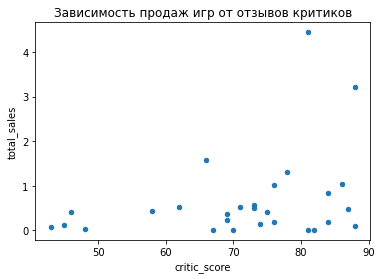

In [64]:
data_actual.query('platform == "WiiU"').plot(x = 'critic_score', y = 'total_sales', 
                                            kind = 'scatter', title = ('Зависимость продаж игр от отзывов критиков'))

In [65]:
data_actual.query('platform == "WiiU"')['total_sales'].corr(data_actual.query('platform == "WiiU"')['user_score'])

0.36351857248094444

<AxesSubplot:title={'center':'Зависимость продаж игр от отзывов пользователей'}, xlabel='user_score', ylabel='total_sales'>

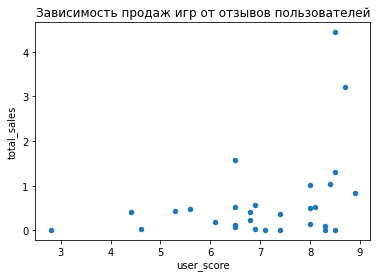

In [66]:
data_actual.query('platform == "WiiU"').plot(x = 'user_score', y = 'total_sales', 
                                            kind = 'scatter', title = ('Зависимость продаж игр от отзывов пользователей'))

**5. Платформа `PC`**

На этой платформе так же, как и на предыдущей, наблюдается связь между продажами и отзывами критиков, а также слабая (но имеющаяся!) связь между продажами и отзывами покупателей, однако, меньше, чем на предыдущей платформе.

In [67]:
data_actual.query('platform == "PC"')['total_sales'].corr(data_actual.query('platform == "PC"')['critic_score'])

0.3773317477241351

<AxesSubplot:title={'center':'Зависимость продаж игр от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

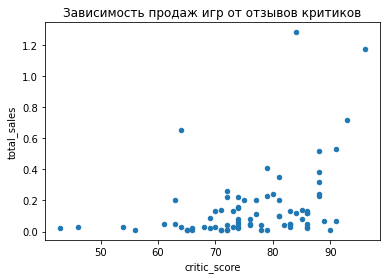

In [68]:
data_actual.query('platform == "PC"').plot(x = 'critic_score', y = 'total_sales', 
                                            kind = 'scatter', title = ('Зависимость продаж игр от отзывов критиков'))

In [69]:
data_actual.query('platform == "PC"')['total_sales'].corr(data_actual.query('platform == "PC"')['user_score'])

0.15038053045029076

<AxesSubplot:title={'center':'Зависимость продаж игр от отзывов пользователей'}, xlabel='user_score', ylabel='total_sales'>

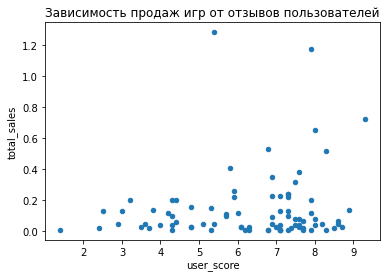

In [70]:
data_actual.query('platform == "PC"').plot(x = 'user_score', y = 'total_sales', 
                                            kind = 'scatter', title = ('Зависимость продаж игр от отзывов пользователей'))

**Вывод по блоку:**

Было найдено, что между отзывами критиков и продажами игр в среднем существует слабая зависимость, тогда как зависимость между оценками пользователей и продажами, по большей части, отсутствует. 
Думаю, это связано с тем, что высокую оценку критиков всегда получают ожидаемые серийные игры (FIFA, Call of Duty, GTA, Fallout), которые всегда хорошо продаются- это и дает слабую взаимосвязь между величинами. Однако при высоких продажах такая игра все равно может "не зайти" игрокам и получить низкие оценки пользователей. 

Среди рассмотренных платформ только `WiiU` и `PC` имеют слабую взаимосвязь продаж с обеими величинами- это значит, что при выборе игр пользователи этой платформы все-таки обращают внимание на отзывы. 

### 3.3.3. Распределение игр по жанрам.
Рассмотрим распределение игр по жанрам. Создадим сводную таблицу, где найдем самые кассовые и самые малопродаваемые жанры компьютерных игр:

In [71]:
data_genre_all = data_actual.pivot_table(columns = 'platform', 
                                     index = 'genre', values = 'total_sales', aggfunc = 'sum', fill_value=0)
data_genre_all['total'] = data_genre_all.sum(axis = 1)
data_genre_all.sort_values(by = 'total', ascending = False)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,total
genre,,,,,,,,,,,
Shooter,0.00,3.29,2.48,57.16,0.00,0.00,0.00,4.81,2.38,35.61,105.73
Action,18.42,2.81,6.37,48.05,0.12,4.73,0.19,4.18,3.31,13.95,102.13
Sports,0.14,0.58,7.27,34.67,0.00,0.30,0.00,0.44,5.14,15.79,64.33
Role-Playing,15.20,2.53,1.23,23.51,0.00,3.09,0.00,1.52,0.00,8.74,55.82
Misc,2.76,0.04,0.70,2.23,0.00,0.76,1.13,3.63,0.58,2.34,14.17
Fighting,0.43,0.10,0.74,7.57,0.00,0.12,0.00,1.01,0.23,2.17,12.37
Adventure,0.69,0.34,1.05,5.16,0.00,1.23,0.00,0.01,1.28,2.22,11.98
Racing,0.00,0.33,0.10,5.76,0.00,0.05,0.00,0.00,0.01,4.61,10.86
Platform,0.77,0.06,0.11,2.49,0.00,0.04,0.00,5.34,0.19,0.28,9.28


<AxesSubplot:xlabel='Жанр', ylabel='Объем продаж'>

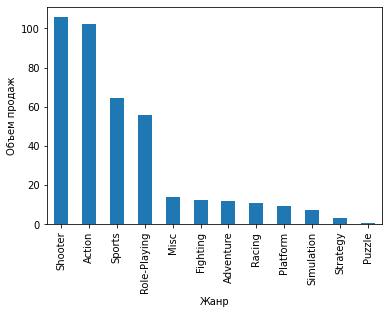

In [72]:
data_genre_all.sort_values(by = 'total', ascending = False)['total'].plot(kind = 'bar', xlabel = 'Жанр', 
                                                                          ylabel = 'Объем продаж')

Из сводной таблицы и диаграммы видно, что самыми популярными жанрами игр (среди всех платформ) являются: 
- Shooter (продажи- 105.73)
- Action (продажи - 102.13) 
- Sports (продажи - 64.33)
- Role-Playing (продажи - 55.82)
- Fighting (продажи - 11.28)

И самые низкоприбыльные жанры: 
- Simulation (продажи- 7.55)
- Strategy (продажи - 2.98)
- Puzzle (продажи - 0.72)

Посмотрим, какое же распределение по жанрам в приоритетных платформах: 

In [73]:
data_genre_top = data_actual.query('platform in @data_actual_top.index').pivot_table(columns = 'platform', 
                                     index = 'genre', values = 'total_sales', aggfunc = 'sum', fill_value=0)
data_genre_top['total'] = data_genre_top.sum(axis = 1)
data_genre_top.sort_values(by = 'total', ascending = False)

platform,3DS,PC,PS4,WiiU,XOne,total
genre,,,,,,
Shooter,0.00,3.29,57.16,4.81,35.61,100.87
Action,18.42,2.81,48.05,4.18,13.95,87.41
Sports,0.14,0.58,34.67,0.44,15.79,51.62
Role-Playing,15.20,2.53,23.51,1.52,8.74,51.50
Fighting,0.43,0.10,7.57,1.01,2.17,11.28
Misc,2.76,0.04,2.23,3.63,2.34,11.00
Racing,0.00,0.33,5.76,0.00,4.61,10.70
Platform,0.77,0.06,2.49,5.34,0.28,8.94
Adventure,0.69,0.34,5.16,0.01,2.22,8.42


Видно, что и в выбранных платформах точно такой же порядок популярных и непопулярных платформ.
Проверим, сколько приносят 2 самые популярные и 2 самые непопулярные платформы:


In [74]:
round((data_genre_top.loc['Action', 'total'] + data_genre_top.loc['Shooter', 'total']) /  
      data_genre_top['total'].sum(), 2)  #доля 2 самых популярных категорий

0.53

In [75]:
round((data_genre_top.loc['Strategy', 'total'] + data_genre_top.loc['Puzzle', 'total']) /  
      data_genre_top['total'].sum(), 2)  #доля 2 самых непопулярных категорий

0.01

Построим диаграмму, где посмотрим на самые популярные жанры в разрезе платформ.

**По самым популярным жанрам** можно сказать следующее: 

1) В жанре "Shooter" на первом месте `PS4`, далее `Xone`, платформа `3DS` практически не представлена. 

2) В жанре "Action" лидирует платформа `PS4`, далее идет `3DS`. Меньше всех представлена платформа `PC`.

3) Жанр "Sports" - лидеры те же, что и у "Shooter", платформы `3DS` и `WiiU` - минимальные продажи.

4) Жанр "Role-Playing" - лидирует `PS4`, далее идет `3DS`, все остальные платформы представлены намного меньше. Минимальное значение - у платформы `WiiU`.

5) Жанр "Fighting" - на первом месте `PS4`, далее `Xone`, остальные платформы представлены мало.

<AxesSubplot:xlabel='Жанр', ylabel='Объем продаж'>

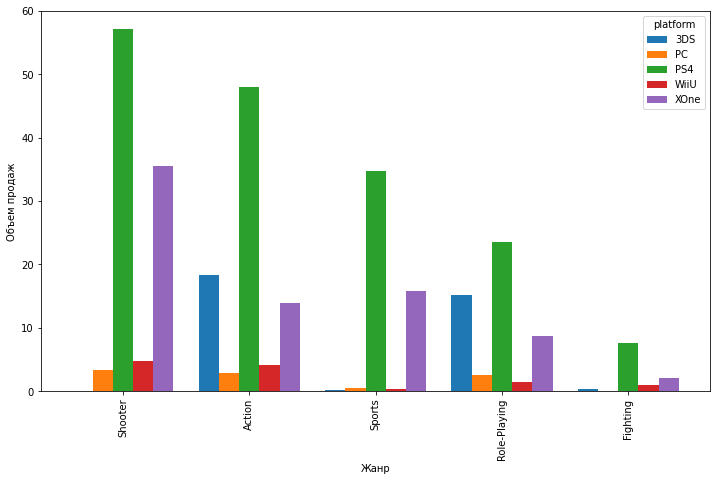

In [76]:
data_genre_top_head5 = data_genre_top.sort_values(by = 'total', ascending = False).head()
data_genre_top_head5 = data_genre_top_head5[['3DS', 'PC', 'PS4', 'WiiU', 'XOne']]
data_genre_top_head5.plot(kind = 'bar', width = 0.8, figsize = (12, 7), xlabel = "Жанр", ylabel = "Объем продаж")

Если посчитать долю 5 самых популярных жанров игр в общих продажах выбранных платформ, то она гигантская и составляет 86% от общих продаж. 

In [77]:
round((data_genre_top.loc['Action', 'total'] + data_genre_top.loc['Shooter', 'total'] + data_genre_top.loc
       ['Role-Playing', 'total'] + data_genre_top.loc['Sports', 'total'] + data_genre_top.loc
      ['Fighting', 'total']) /  data_genre_top['total'].sum(), 2)  #доля 5 самых популярных категорий

0.86

Сделаем выборку по **самым непопулярным жанрам**.

1) Жанр "Platform" - больше всего продаж у платформы `WiiU`, далее идет `PS4`. 

2) Жанр "Adventure" - безоговорочно лидирует `PS4`, остальные платформы представлены мало. 

3) Жанр "Simulation" - лидирует `3DS` с огромным отрывом от других платформ. 

4) Жанр "Strategy" - больше всего продаж у платформы `PС`. 

5) Жанр "Puzzle" - лидирует `3DS`. Остальные платформы практически не представлены. 

<AxesSubplot:xlabel='Жанр', ylabel='Объем продаж'>

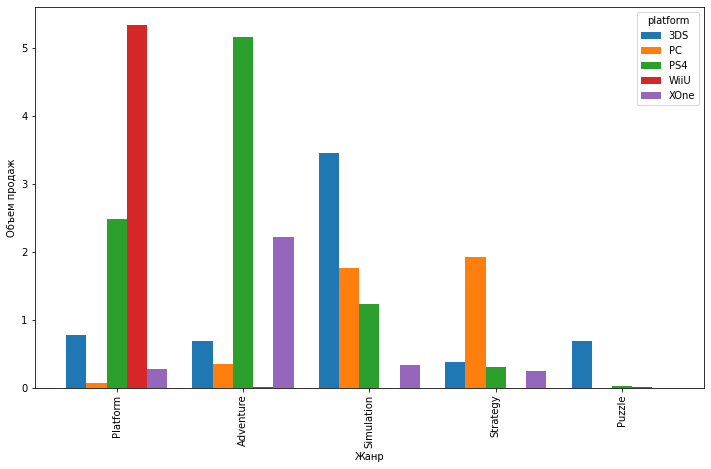

In [78]:
data_genre_top_tail5 = data_genre_top.sort_values(by = 'total', ascending = False).tail()
data_genre_top_tail5 = data_genre_top_tail5[['3DS', 'PC', 'PS4', 'WiiU', 'XOne']]
data_genre_top_tail5.plot(kind = 'bar', width = 0.8, figsize = (12, 7), xlabel = "Жанр", ylabel = "Объем продаж")

Если по аналогии с предыдущим шагом посчитать долю 5 самых малораспостраненных жанров, то она составит всего 8% от общих продаж. 

In [79]:
round((data_genre_top.loc['Platform', 'total'] + data_genre_top.loc['Simulation', 'total'] + data_genre_top.loc
       ['Adventure', 'total'] + data_genre_top.loc['Strategy', 'total'] + data_genre_top.loc
      ['Puzzle', 'total']) /  data_genre_top['total'].sum(), 2)  #доля 5 самых непопулярных категорий

0.08

Проанализируем 5 самых популярных жанров на диаграмме размаха. 
Если посмотреть первый график, видно, что наиболее длинный ряд успешно продающихся игр в жанре `Shooter`- здесь и самое высокое значение Q3 (около 1,75), и самое большое значение верхней границы межквартильного размаха (значение ок. 4). Также в этом жанре есть игра-лидер продаж (значение ок. 14,5). 
Изменим масштаб и рассмотрим графики более детально. 

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

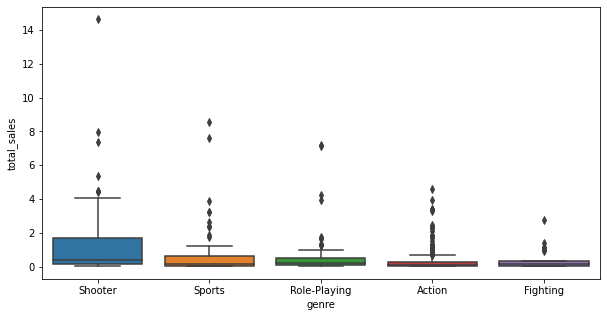

In [80]:
plt.figure(figsize=[10,5])
sns.boxplot(data = data_actual.query('platform in @data_actual_top.index and genre in @data_genre_top_head5.index'), 
            x = 'genre', y = 'total_sales')

На масштабированном графике продолжает выделяться жанр `Shooter` - как имеющий самый большой предел Q3 (ок. 1.75). Если рассмотреть медианное значение, то жанр `Shooter` снова будет лидировать (медиана - ок. 0.40, т.е. сдвинута вниз к пределу Q1). Далее с отрывом идет жанр `Role-Playing` (медиана - ок. 0,25), за ним -  `Sports` и `Fighting` (ок. 0.2) и завершает пятерку `Action` - медиана в районе 0.15. У всех жанров медиана сдвинута вниз, к Q1, предел Q3 для жанров составляет: 
- `Shooter` - 1.75.
- `Sports` - 0.60.
- `Role-Playing` - 0.50.
- `Fighting` - 0.35. 
- `Action` - 0.30.

Предел верхнего межквартильного размаха уменьшается в такой же последовательности, за исключением того, что у жанра `Fighting` граница Q3 практически совпадает с верхним пределом. 
У жанра `Action` - видим большое количество "выбросов", которые не попали в статистические показатели - т.е. у этого жанра кроме "середнячков" есть и немало кассовых игр. 

Из всего вышеперечисленного, считаю, что наиболее стабильным является жанр `Shooter` (как самый популярный и кассовый - продажи игр в этом жанре выше, чем в каком-либо другом). Также неплохо себя показывают жанры `Sports` (2е место по продажам) и `Action` (имеет как неплохие средние показатели, так и большое количество "кучно" идущих продающихся игр). 

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

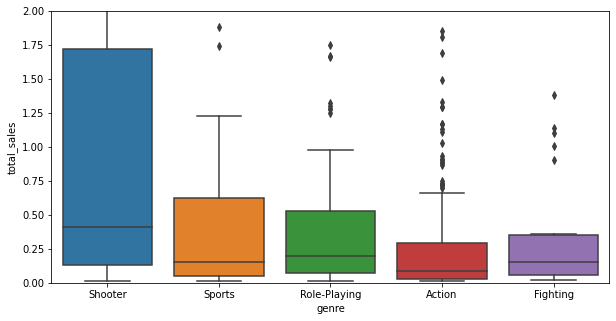

In [81]:
plt.figure(figsize=[10,5])
plt.ylim([0, 2])
sns.boxplot(data = data_actual.query('platform in @data_actual_top.index and genre in @data_genre_top_head5.index'), 
            x = 'genre', y = 'total_sales')

**Вывод по блоку:**

Были найдены как самые популярные, так и наименее популярные жанры игр среди выбранных платформ. Оказалось, что среди самых популярных жанров велика доля платформs `PS4`, а среди непопулярных жанров больше всего игр представлено на платформе `3DS`. Два самых популярных жанра (Action, Shooter) - приносят 53% от продаж всех игр (при общей доле в продажах 5 самых популярных жанров в 86%) , два самых непопулярных (Strategy, Puzzle) - приносят около 1 % (при доле 5 самых непопулярных жанров в 8%). 
Наиболее стабильным является жанр `Shooter` (как самый популярный и кассовый - продажи игр в этом жанре выше, чем в каком-либо другом).

# 4. Портрет пользователя в каждом из регионов
Рассмотрение пользователя каждого региона невозможно без сравнения с глобальными показателями. 
Посмотрим, какие платформы из выбранных нами популярны в том или ином регионе. 

In [82]:
platform_global = data_actual_top
platform_global['percent'] = round((platform_global['total_sales'] / platform_global['total_sales'].sum() *100), 2)

In [83]:
platform_na = data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'platform', values = 'na_sales', 
                        aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()
platform_na['percent'] = round((platform_na['na_sales'] / platform_na['na_sales'].sum() *100), 2)

In [84]:
platform_eu = data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'platform', values = 'eu_sales', 
                        aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()
platform_eu['percent'] = round((platform_eu['eu_sales'] / platform_eu['eu_sales'].sum() *100), 2)

In [85]:
platform_jp = data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'platform', values = 'jp_sales', 
                        aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()
platform_jp['percent'] = round((platform_jp['jp_sales'] / platform_jp['jp_sales'].sum() *100), 2)

## 4.1. Популярные игровые консоли в каждом из регионов
Построим общий график, где рассмотрим популярные консоли в каждом из регионов. 

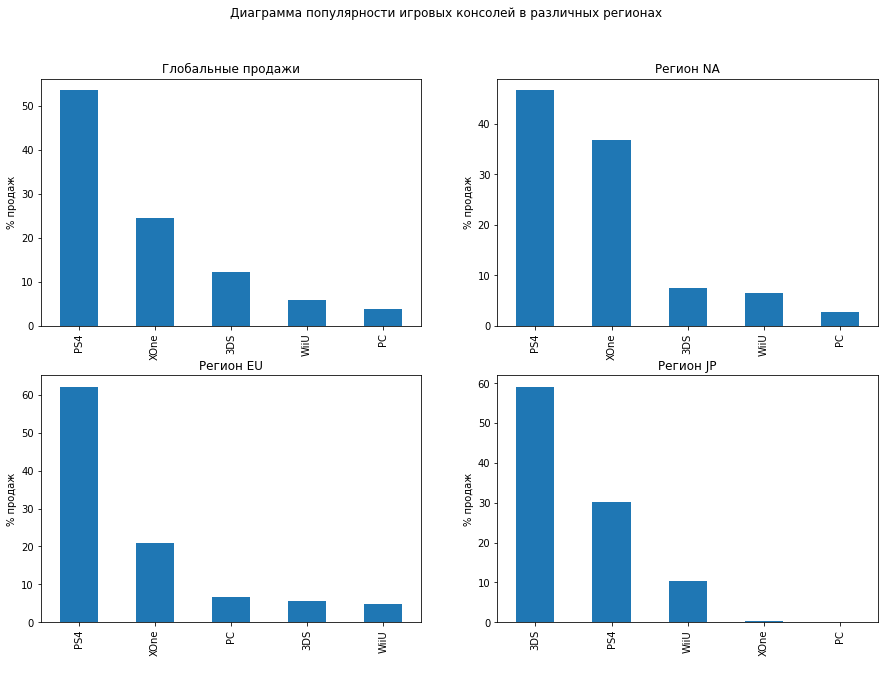

In [86]:
fig = plt.figure(figsize=(15, 10))
plt.suptitle("Диаграмма популярности игровых консолей в различных регионах")

plt.subplot(2, 2, 1)
platform_global['percent'].plot(kind = 'bar', xlabel = ' ', ylabel = '% продаж', title = ('Глобальные продажи'))

plt.subplot(2, 2, 2)
platform_na['percent'].plot(kind = 'bar', xlabel = ' ', ylabel = '% продаж', title = ('Регион NA'))

plt.subplot(2, 2, 3)
platform_eu['percent'].plot(kind = 'bar', xlabel = ' ', ylabel = '% продаж', title = ('Регион EU'))

plt.subplot(2, 2, 4)
platform_jp['percent'].plot(kind = 'bar', xlabel = ' ', ylabel = '% продаж', title = ('Регион JP'))

plt.show()

Видно, что в регионах `NA` и `EU` безоговорочные лидеры сохраняются: на первом месте платформа `PS4` (ок. 45% в регионе `NA` и 60% - в регионе `EU`), далее идет платформа `XOne` (ок. 35% в регионе `NA` и 20% - в регионе `EU`). Затем порядок популярности меняется: в регионе `NA` это `3DS`, `WiiU` (9 и 7% соответственно) и `PC` (ок. 5%); в регионе `EU` оставшиеся 3 платформы занимают долю примерно по 7% каждая.  

В регионе `JP` лидеры продаж совсем иные- на первом месте с большим отрывом `3DS` (ок. 58%), далее `PS4` (ок. 30%), `WiiU` (ок. 10%). `XOne` занимает долю в 1-2% и `PC` вообще не котируется на данном рынке.  Т.е в этом регионе тренды абсолютно не совпадают с глобальными показателями и было верным решением выбрать как потенциально прибыльные непопулярные на европейском рынке `3DS` и `WiiU`.

## 4.2. Популярные игровые жанры в каждом из регионов
Здесь также составим общий график и посмотрим на различия в жанрах. 

In [87]:
genre_global = data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'genre', 
                                            values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head()
genre_global['percent'] = round((genre_global['total_sales'] / genre_global['total_sales'].sum() *100), 2)

In [88]:
genre_na = data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'genre', 
                                            values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()
genre_na['percent'] = round((genre_na['na_sales'] / genre_na['na_sales'].sum() *100), 2)

In [89]:
genre_eu = data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'genre', 
                                            values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()
genre_eu['percent'] = round((genre_eu['eu_sales'] / genre_eu['eu_sales'].sum() *100), 2)

In [90]:
genre_jp= data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'genre', 
                                            values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()
genre_jp['percent'] = round((genre_jp['jp_sales'] / genre_jp['jp_sales'].sum() *100), 2)

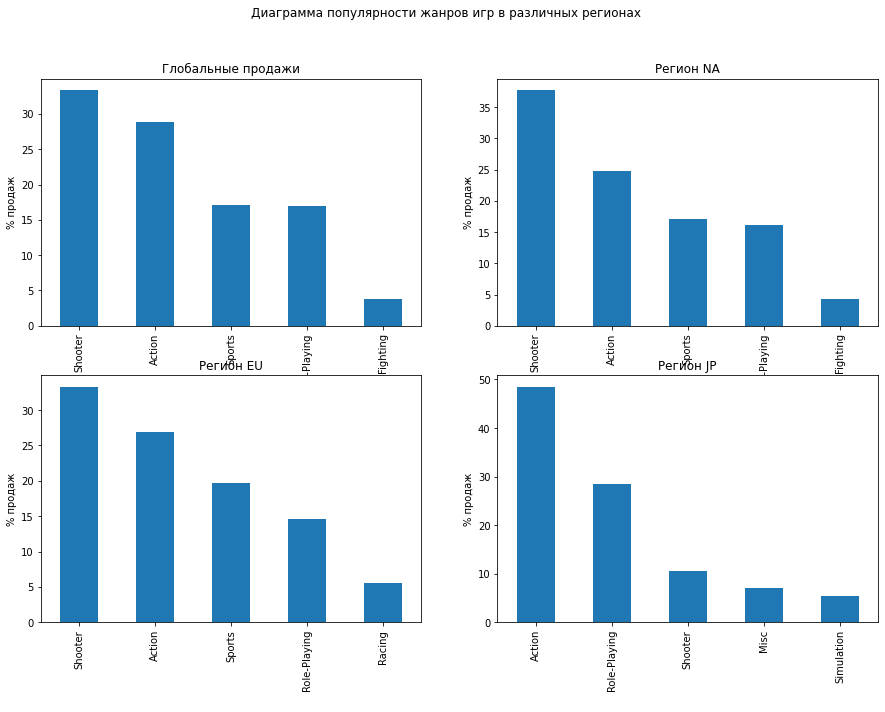

In [91]:
fig = plt.figure(figsize=(15, 10))
plt.suptitle("Диаграмма популярности жанров игр в различных регионах")

plt.subplot(2, 2, 1)
genre_global['percent'].plot(kind = 'bar', xlabel = ' ', ylabel = '% продаж', title = ('Глобальные продажи'))

plt.subplot(2, 2, 2)
genre_na['percent'].plot(kind = 'bar', xlabel = ' ', ylabel = '% продаж', title = ('Регион NA'))

plt.subplot(2, 2, 3)
genre_eu['percent'].plot(kind = 'bar', xlabel = ' ', ylabel = '% продаж', title = ('Регион EU'))

plt.subplot(2, 2, 4)
genre_jp['percent'].plot(kind = 'bar', xlabel = ' ', ylabel = '% продаж', title = ('Регион JP'))

plt.show()

Как видно, ТОП-5 в регионе `NA` абсолютно совпадает с глобальным. В регионе `EU` - все также совпадает с глобальной разбивкой, за исключением последней, 5 позиции- в регионе на этом месте располагается жанр `Racing`, а не `Fighting`. Но лидеры остаются теми же самыми: на первом месте с большим отрывом жанр `Shooter`, на втором- `Action`.

В регионе `JP`, как и в прошлом случае, ситуация совершенно иная: глобальный лидер `Shooter` всего лишь на 3м месте, тогда как на первом - `Action` (ок. 48%), далее - `Role-Playing` (ок. 30%). В пятерку здесь также попали жанры, которых не было ранее- на 4м месте `Misc` (ок. 8%) и `Simulation`(ок. 7%).

## 4.1. Портрет пользователя Североамериканского региона (NA)

Составление портретов игроков начнем с Североамериканского региона (`NA`). Как видно, ТОП-5 платформ остался таким же, как и был выбран мною для рассмотрения, но есть различия в доле продаж. 

В этом регионе распределение популярных жанров полностью совпадает с глобальными лидерами, безоговорочно лидирует жанр `Shooter`. Если мы загрузим список самых популярных игр, то увидим, что из 5 самых популярных игр по 2 из них- на платформах `PS4` и `XOne`, пятая - на платформе `3DS`.

In [92]:
data_actual.query('platform in @data_actual_top.index').sort_values(by = 'na_sales', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_score,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,4.0,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,M,4.0,7.39
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,4.0,7.98
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,T,3.0,7.14
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,3.0,4.49


Рассмотрим также, влияет ли рейтинг игры на ее продажи? Рассмотрим это при помощи сводной таблицы:

In [93]:
data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'rating', values = 'na_sales')

,na_sales
rating,
E,0.131429
E10+,0.162200
M,0.432603
T,0.106132


<AxesSubplot:xlabel='rating'>

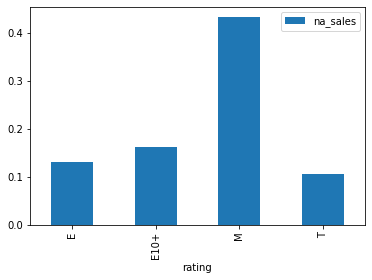

In [94]:
data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'rating', values = 'na_sales').plot(kind = 'bar')

Если посмотреть на график, то видно, что самыми популярными являются игры для взрослых (М - категория 17+), далее идут семейные игры Е10+ (от 10 лет), (Е - категория 6+) и, наконец, игры для подростков (Т - 14+). Можно предположить, что покупатели приставок берут игры сначала для себя, а потом и для детей, чем и обуславливается популярность данных двух категорий. В списке самых полпулярных игр для данного региона видно, что 3 из 5 популярных игр имеют взрослый рейтинг М, а 2 - подростковый рейтинг Т. 

Таким образом, портрет среднего игрока в регионе `NA`: **пользователь, играющий в Shooter - "Call of Duty: Black Ops II" (рейтинг М), на платформе PS4**

## 4.2. Портрет пользователя Европейского региона (EU)

Продолжим составлять портреты пользователей и перейдем на европейский рынок (`EU`). Посмотрим игры-лидеры продаж и изучим распределение рейтингов игр:

В этом регионе, в отличие от предыдущего, все 5 популярных игр выпущены на одну платформу- `PS4`. Лидером продаж же здесь стала игра жанра `Sports` - **FIFA16**

In [95]:
data_actual.query('platform in @data_actual_top.index').sort_values(by = 'eu_sales', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_score,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,1.0,8.58
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,4.0,14.63
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,1.0,7.60
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,4.0,7.98
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,4.0,7.17


В распределении игр по рейтингу сохраняется та же картина, что и в североамериканском регионе - лидируют игры с рейтингом М, далее Е, Е10+ и Т. Можно сказать то же самое, что приставка покупается не только для индивидуального, но и для семейного пользования. Однако если мы посмотрим на таблицу 5 самых популярных игр региона, то 3 из них имеют "взрослый" рейтинг М, 2 же другие- имеют "семейный" рейтинг Е (6+), что наводит на мысль- в этом регионе популярны игры в приставку с детьми и пользователи обращают внимание на такие игры. 

In [96]:
data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'rating', values = 'eu_sales')

,eu_sales
rating,
E,0.193901
E10+,0.101900
M,0.408082
T,0.092956


<AxesSubplot:xlabel='rating'>

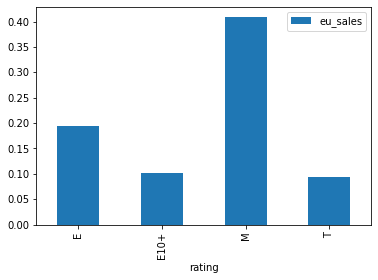

In [97]:
data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'rating', values = 'eu_sales').plot(kind = 'bar')

Тем самым, портрет европейского пользователя следующий:  **пользователь, играющий в Sports - "FIFA 16" (рейтинг М), на платформе PS4**

## 4.3. Портрет пользователя Японского региона (JP)

Рассмотрим портрет японского польхователя (`JP`). Как было сказано выше, лидирующие консоли здесь совсем другие, нежели в Европейском или Североамериканском регионе, здесь лидирует `3DS` и `WiiU`. Посмотрим, какие же игры популярны здесь: 

ТОП популярных игр также кардинально отличается от топа игр Америки и Европы - здесь 4 из 5 игр принадлежат платформе 3DS и 2 игры из 5 - в жанре `Action`. 

In [98]:
data_actual.query('platform in @data_actual_top.index').sort_values(by = 'jp_sales', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_score,total_sales
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,T,3.0,3.32
694,Yokai Watch Busters,3DS,2015,Action,0.00,0.00,2.29,0.00,NaN,NaN,T,3.0,2.29
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,T,3.0,7.14
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,2.0,4.44
457,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,0.51,1.02,1.40,0.12,66.0,6.9,E,1.0,3.05


Если посмотреть на влияние рейтинга игры на продажи, здесь опять же данные очень отличаются от регионов `NA` и `EU`. 
Лидируют с большим отрывом - игры для подростков (Т- 14+), затем игры для детей Е (6+) и Е10+ (10+), игры для взрослых игроков (М)- только четвертом, последнем месте. 
Можно предположить, что здесь приставки покупаются в первую очередь для детей, взрослые играют в них намного меньше. Это подтверждается и тем, что самая популярная игра в данном регионе имеет рейтинг Т. 

In [99]:
# check
df = pd.read_csv('/datasets/games.csv')

df.info()
df['Rating'] = df['Rating'].fillna('unknown')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [100]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


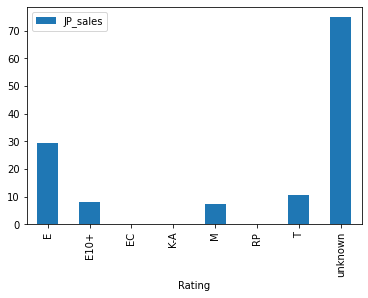

In [110]:
(
    df
    .query('Platform in @data_actual_top.index')
    .pivot_table(index = 'Rating', values = 'JP_sales', aggfunc = 'sum')
    .plot(kind = 'bar')
);

<AxesSubplot:xlabel='rating'>

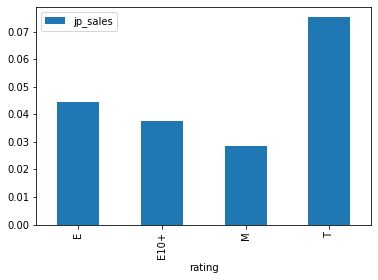

In [102]:
data_actual.query('platform in @data_actual_top.index').pivot_table(index = 'rating', values = 'jp_sales').plot(kind = 'bar')

Таким образом, портрет пользователя в регионе `JP`: **пользователь, играющий в Action - "Monster Hunter X" (рейтинг Т) на платформе 3DS**

**Вывод по блоку:**

В процессе исследования было выяснено, что предпочтения игроков из регионов `NA` и `EU` схожи, это подтверждается пересечениями в самых популярных приставках  и жанрах игр.  Пользователи из этих регионов покупают приставки в первую очередь для личного использования, но также велика доля и игр для детей. В общем, данные по регионам `NA` и `EU` совпадают с общемировыми показателями. 

Ситуация же в японском регионе `JP` абсолютно иная. В лидерах - совершенно иные приставки, нежели в двух других регионах, рейтинг жанров тоже отличается. Возможно, это связано с тем, что большой популярностью в японском регионе пользуются семейные игры, что может значить следующее- приставка покупается как подарок для ребенка или средство семейного досуга. 


# 5. Проверка гипотез
## 5.1. Средние пользовательские рейтинги платформ XBox One и PC - одинаковые

Проверим гипотезы и подтвердим или опровергнем их. 
Сформулируем нулевую и альтернативную гипотезы: 

- Н0: "Средние пользовательские рейтинги платформ XBox One и PC - **равны**"
- Н1: "Средние пользовательские рейтинги платформ XBox One и PC - **не равны**"

Для подтверждения или опровержения воспользуемся гипотезой о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.  Для проверки используем метод `st.ttest_ind` и зададим `alpha = 0.05` и параметр `equal_var = False` - дисперсии выборок не считать равными. 

In [103]:
sample_xone = data_actual.query('platform in @data_actual_top.index and platform == "XOne"')['user_score']
sample_xone = sample_xone.dropna()
xone_array = np.asarray(sample_xone)

In [104]:
sample_pc = data_actual.query('platform in @data_actual_top.index and platform == "PC"')['user_score']
sample_pc = sample_pc.dropna()
pc_array = np.asarray(sample_pc)

In [105]:
alpha = .05 # критический уровень статистической значимости

result_platform = st.ttest_ind(xone_array, pc_array, equal_var = False)

print('p-значение: ', result_platform.pvalue)

if result_platform.pvalue < alpha:
    print("Верна альтернативная гипотеза Н1")
else:
    print("Верна нулевая гипотеза Н0") 

p-значение:  0.2946308864003345
Верна нулевая гипотеза Н0


**Вывод**:

В результате теста было получено значение `p-value` = 0.29. Это значит, что мы имеем 29% вероятности получить такое или бОльшее различие случайно. Это большая вероятность, чтобы делать вывод о значимом различии рейтингов. Соответственно,  мы не отвергаем сформулированную нулевую гипотезу о равенстве пользовательских рейтингов на платформах Xbox One и PC. 

In [106]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


## 5.2. Средние пользовательские рейтинги жанров "Action" и "Sports" - разные

Здесь также воспользуемся гипотезой о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.  Для проверки используем метод `st.ttest_ind` и зададим `alpha = 0.05` и параметр `equal_var = False` - дисперсии выборок не считать равными. 
Сформулируем гипотезы: 

- Н0: "Средние пользовательские рейтинги жанров "Action" и "Sports" - равны."
- Н1: "Средние пользовательские рейтинги жанров "Action" и "Sports" - НЕ равны."

In [107]:
sample_action = data_actual.query('platform in @data_actual_top.index and genre == "Action"')['user_score']
sample_action = sample_action.dropna()
action_array = np.asarray(sample_action)

In [108]:
sample_sports = data_actual.query('platform in @data_actual_top.index and genre == "Sports"')['user_score']
sample_sports = sample_sports.dropna()
sports_array = np.asarray(sample_sports)

In [109]:
alpha = .05 # критический уровень статистической значимости

result_platform = st.ttest_ind(action_array, sports_array, equal_var = False)

print('p-значение: ', result_platform.pvalue)

if result_platform.pvalue < alpha:
    print("Верна альтернативная гипотеза Н1")
else:
    print("Верна нулевая гипотеза Н0") 

p-значение:  1.6403234671994533e-06
Верна альтернативная гипотеза Н1


**Вывод:**

В этом случае отвергается нулевая гипотеза о равенстве рейтингов в жанрах "Action" и "Sports" в пользу альтернативной -  "Средние пользовательские рейтинги жанров "Action" и "Sports" - **НЕ равны**", т.е. рейтинги действительно разные. 
Видно, что `p-value` очень мал, а это значит, что мы имеем очень малую вероятность получить результат Н0 случайно. 

# Вывод

В ходе проекта были исследованы данные о продажах и популярности игр на различнх игровых консолях для прогнозирования дальнейших продаж. В процессе исследования было решено выбрать период исследования с 2014 по 2016 гг., а также выбраны приоритетные консоли для иследования: 
- PS4;
- XOne;
- 3DS;
- WiiU;
- PC.

Платформа Х360 не была мною выбрана, т.к. я считаю ее в срезе данного исследования устаревающей и не имеющей эксклюзивных игр, она заменяется своим последователем XOne, то же самое- и с платформой PS3 (есть продукт-последователь - PS4)

В разрезе выбранного периода и консолей был произведен анализ глобальных продаж игр на платформах при помощи диаграммы boxplot(), где было выяснено, что максимальная граница межквартильного размаха платформ находится на уровне 1,35 (для платформы `XOne` и это максимум для выбранных платформ), однако популярные игры могут давать "выбросы" в объеме продаж вплоть до значения 15 (`PS4`).

Также было выяснено, что отзывы критиков хоть и связаны и объемом продаж игры, но довольно слабо. Отзывы пользователей и вовсе не связаны с продажей. Однако эти тезисы не относятся к платформе `3DS`- только на этой платформе есть слабая взаимосвязь продаж как с отзывами критиков, так и с отзывами пользователей. Пользователи этой платформы при покупке игр ориентируются на отзывы таких же пользователей. 

Были найдены самые популярные жанры игр, доля продаж которых на выбранных платформах достигает 86%. 
Это такие жанры, как: 
- Shooter (продажи- 105.73)
- Action (продажи - 102.13) 
- Sports (продажи - 64.33)
- Role-Playing (продажи - 55.82)
- Fighting (продажи - 11.28)

Также были рассмотрена и пятерка самых непопулярных жанров, их доля в продаже на выбранных платформах не превышает 8%. 

В процессе работы также были составлены портреты пользователей из разных регионов: 
- в регионе `NA`: пользователь, играющий в Shooter - "Call of Duty: Black Ops II" (рейтинг М), на платформе PS4;
- в регионе `EU`: пользователь, играющий в Sports - "FIFA 16" (рейтинг М), на платформе PS4;
- в регионе `JP`: пользователь, играющий в Action - "Monster Hunter X" (рейтинг Т) на платформе 3DS, 

а также проверено 2 гипотезы. В первом случае нулевая гипотеза Н0: "Средние пользовательские рейтинги платформ XBox One и PC - **равны**" - не отвергается, во втором нулевая гипотеза "Средние пользовательские рейтинги жанров "Action" и "Sports" - **равны**" - отвергается в пользу альтернативной гипотезы Н1. 

Тем самым, проделанное исследование дает ясность о том, какие игры и на каких платформах можно предлагать конечным потребителям, соответствующим созданному портрету потребителя.